# <pre> Time Series Forecasting using Convolutional Neural Network (CNN)

## 1.Loading the Data

In [45]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
amazon_stock_price_df = pd.read_csv('/content/mydata.csv')

In [4]:
amazon_stock_price_df.shape

(3552, 36)

## 2.Data Preprocessing

### 2.1 DELETING UNWANTED COLUMNS

In [5]:
amazon_stock_price_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Gain', 'Loss', 'Avg_Gain', 'Avg_Loss', 'RSI', 'SMA',
       'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'ROC', 'PVT',
       'Usd_Eur_Close', 'Usd_Chf_Close', 'Usd_Gbp_Close', 'Usd_Jpy_Close',
       'Usd_Cad_Close', 'Usd_Inf_Close', 'Usd_Rub_Close', 'Usd_Try_Close',
       'IRX_Close', 'JPM_Close', 'BAC_Close', 'Citigroup_Close', 'WFC_Close',
       'NASDAQ_Close', 'SP_500_Close', 'Dow_Jones_Close'],
      dtype='object')

In [6]:
amazon_stock_price_df = amazon_stock_price_df[['Date', 'Open', 'High', 'Low', 'Close']]

In [7]:
amazon_stock_price_df.head(5)

,Date,Open,High,Low,Close
0,2005-01-03,44.95,45.44,44.21,44.52
1,2005-01-04,42.67,43.26,41.50,42.14
2,2005-01-05,41.57,42.76,41.56,41.77
3,2005-01-06,41.81,42.25,40.90,41.05
4,2005-01-07,41.38,42.69,41.16,42.32


###2.2 CONVERTING THE `DATE` COLUMN TO `DATETIME DATATYPE`

In [8]:
amazon_stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3552 non-null   object 
 1   Open    3552 non-null   float64
 2   High    3552 non-null   float64
 3   Low     3552 non-null   float64
 4   Close   3552 non-null   float64
dtypes: float64(4), object(1)
memory usage: 138.9+ KB


In [9]:
amazon_stock_price_df['Date'] = pd.to_datetime(amazon_stock_price_df['Date'])

In [10]:
amazon_stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3552 non-null   datetime64[ns]
 1   Open    3552 non-null   float64       
 2   High    3552 non-null   float64       
 3   Low     3552 non-null   float64       
 4   Close   3552 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 138.9 KB


### 2.3 SETTING THE `DATE` COLUMN AS INDEX

In [12]:
amazon_stock_price_df.set_index('Date', inplace = True)

In [13]:
amazon_stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3552 entries, 2005-01-03 to 2019-08-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3552 non-null   float64
 1   High    3552 non-null   float64
 2   Low     3552 non-null   float64
 3   Close   3552 non-null   float64
dtypes: float64(4)
memory usage: 138.8 KB


In [14]:
amazon_stock_price_df.head(3)

,Open,High,Low,Close
Date,,,,
2005-01-03,44.95,45.44,44.21,44.52
2005-01-04,42.67,43.26,41.50,42.14
2005-01-05,41.57,42.76,41.56,41.77


## 3.Data Normalizing

In [20]:
scaler = MinMaxScaler()
data = scaler.fit_transform(amazon_stock_price_df[amazon_stock_price_df.columns])

In [21]:
data

array([[0.00937366, 0.00945559, 0.00928423, 0.00916342],
       [0.00824047, 0.00837862, 0.00792053, 0.00798137],
       [0.00769376, 0.00813161, 0.00795073, 0.0077976 ],
       ...,
       [0.88886293, 0.88455686, 0.89275578, 0.88172978],
       [0.89129333, 0.89086059, 0.90036432, 0.89273582],
       [0.89557261, 0.8907766 , 0.89286649, 0.88335883]])

## 4.Creating Sliding Window

In [24]:
WINDOW_SIZE = 20

def create_sliding_window(data, window_size):
  X, y = [], []
  for i in range(len(data) - window_size):
    X.append(data[i:i + window_size, :])  # Use all features
    y.append(data[i + window_size, :])    # Predict all columns (Open, High, Low, Close)
  return np.array(X), np.array(y)

X,  y = create_sliding_window(data, WINDOW_SIZE)

In [27]:
X[:1]

array([[[0.00937366, 0.00945559, 0.00928423, 0.00916342],
        [0.00824047, 0.00837862, 0.00792053, 0.00798137],
        [0.00769376, 0.00813161, 0.00795073, 0.0077976 ],
        [0.00781304, 0.00787966, 0.00761861, 0.00744   ],
        [0.00759933, 0.00809703, 0.00774944, 0.00807076],
        [0.00787766, 0.00823041, 0.00802621, 0.00783237],
        [0.00760927, 0.00783519, 0.00767396, 0.00773303],
        [0.007654  , 0.00799328, 0.00757835, 0.00806083],
        [0.00813113, 0.00903073, 0.00834323, 0.00820983],
        [0.00835479, 0.00907025, 0.00835329, 0.00917832],
        [0.00904564, 0.00923822, 0.00925404, 0.00919322],
        [0.0091351 , 0.00910977, 0.00889173, 0.00888529],
        [0.00776334, 0.00872443, 0.00799098, 0.00809063],
        [0.00790251, 0.00802786, 0.00767899, 0.00749464],
        [0.00762915, 0.00773145, 0.00732171, 0.00710724],
        [0.00723154, 0.0074795 , 0.00739216, 0.00738537],
        [0.00749993, 0.00765735, 0.00729655, 0.00758404],
        [0.007

## 5.Train - Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- `3532` Rows
- `20` instances (rows) in a set
- `4` data values in each instance

In [34]:
X.shape, X_train.shape, X_test.shape

((3532, 20, 4), (2825, 20, 4), (707, 20, 4))

## 6.Building the CNN Model

In [39]:
model = tf.keras.Sequential([
    # CONV 1D LAYER
    tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (X.shape[1], X.shape[2])),
    # FLATTENING LAYER
    tf.keras.layers.Flatten(),
    # DENSE HIDDEN LAYER
    tf.keras.layers.Dense(50, activation = 'relu'),
    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(X.shape[2])
])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 19, 64)              │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          60,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,630 (240.74 KB)

 Trainable params: 61,630 (240.74 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# COMPILATION
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['accuracy'])

In [42]:
#TRAINING THE MODEL
model.fit(X_train, y_train, epochs = 20, batch_size = 16)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2524 - loss: 0.0149
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2695 - loss: 2.8323e-04
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2754 - loss: 3.5637e-04
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2691 - loss: 2.4859e-04
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 2.1473e-04
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 2.2580e-04
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3124 - loss: 1.6937e-04
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.9349e-04
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2707 - loss: 2.0389e-04
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2634 - loss: 1.8846e-04
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2468 - loss: 3.5988e-04
Epoch 12/20


## 7.Prediction & Evaluation

In [44]:
preds = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Visualizing the first `100` datapoints from `actual` and `predicted` data

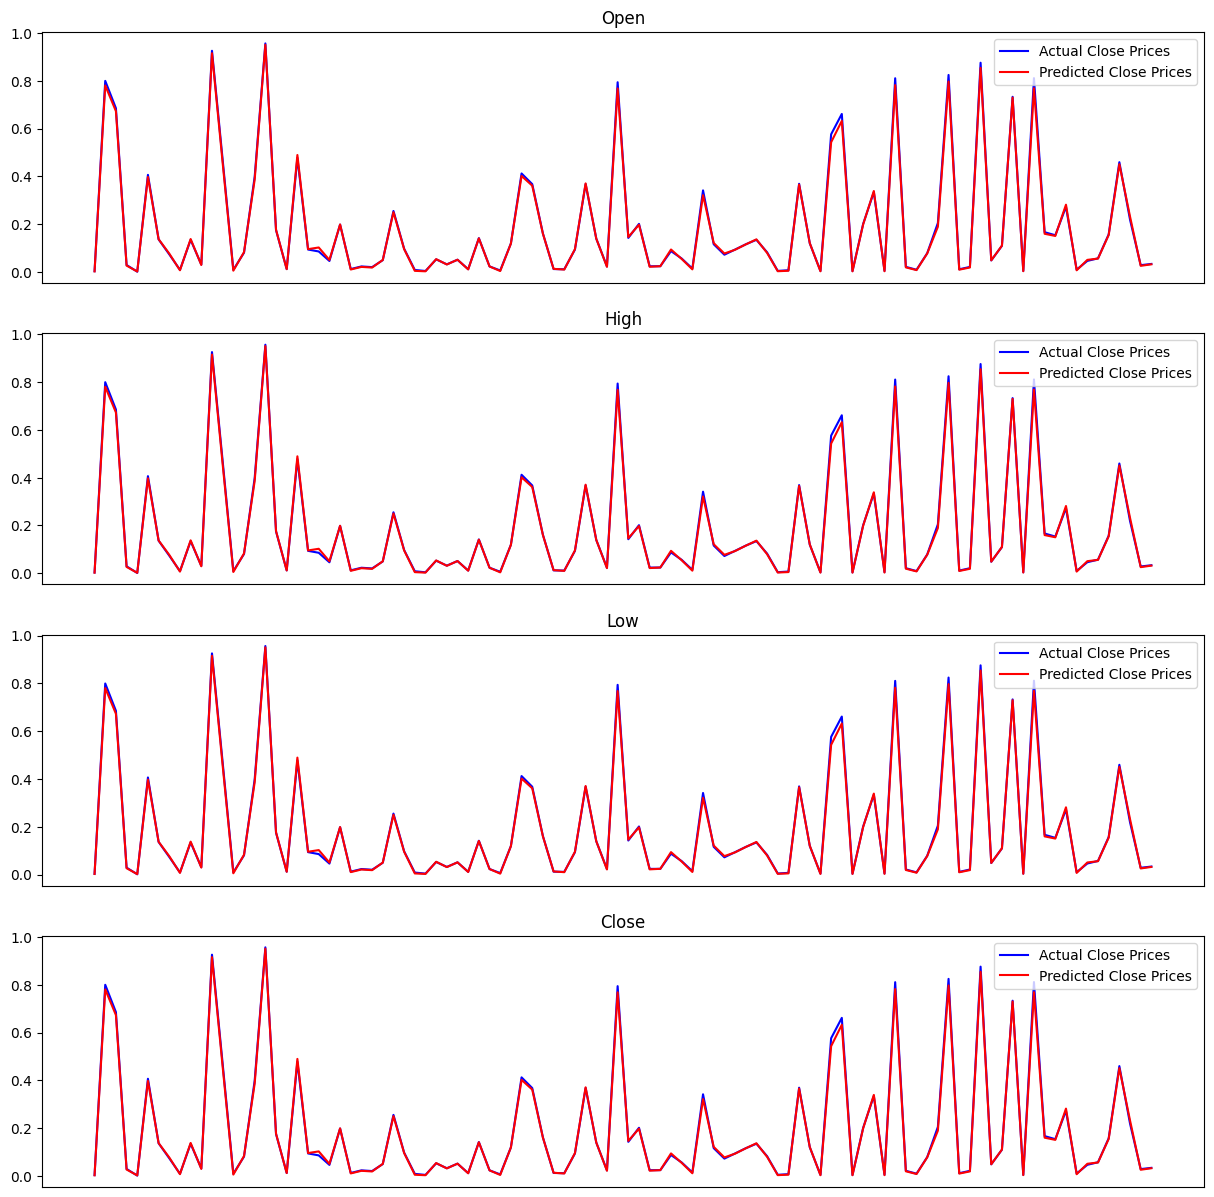

In [49]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(4)

for ax, col in zip(axes, amazon_stock_price_df.columns):
  ax.plot(y_test[:100, -1], label='Actual Close Prices', color = 'blue')
  ax.plot(preds[:100, -1], label='Predicted Close Prices', color = 'red')
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)
  ax.legend()